In [2]:
import numpy as np

def reshapeAndAppend1s(faces):
    faces = faces[:, :, ::-1]
    faces = faces.T
    faces = np.reshape(faces, (faces.shape[0] ** 2, faces.shape[2]))
    faces = np.vstack((faces, np.ones(faces.shape[1])))
    return faces

def fMSE (w, Xtilde, y):
    yhat = Xtilde.T.dot(w) 
    fmse = ((yhat-y)**2).mean() / 2
    return fmse

def gradfMSE (w, Xtilde, y, alpha = 0.):
    return (Xtilde * (Xtilde.T.dot(w) - y)).mean() + (w[:-1].T.dot(w[:-1])).mean() * (alpha/2)

def grad_descent(alpha = 0.):
    lr = 3e-3  # Step size aka learning rate
    epochs = 5000  # Number of gradient descent iterations

    w = 0.01 * np.random.randn(xtr.shape[0])

    for i in range(epochs):
        w = w - (lr * gradfMSE(w, xtr, ytr))
        
    return w

xtr = reshapeAndAppend1s(np.load("age_regression_Xtr.npy"))
ytr = np.load("age_regression_ytr.npy")
xte = reshapeAndAppend1s(np.load("age_regression_Xte.npy"))
yte = np.load("age_regression_yte.npy")

In [3]:
w1 = np.linalg.solve(xtr.dot(xtr.T), xtr.dot(ytr))

In [4]:
w2 = grad_descent()

In [5]:
w3 = grad_descent(0.1)

In [6]:
print(fMSE(w1, xtr, ytr))
print(fMSE(w1, xte, yte))

print(fMSE(w2, xtr, ytr))
print(fMSE(w2, xte, yte))

print(fMSE(w3, xtr, ytr))
print(fMSE(w3, xte, yte))

39.242962989290696
206.7964748541472
138.39569310345385
142.2624090730585
138.3170561430746
142.17673546896182


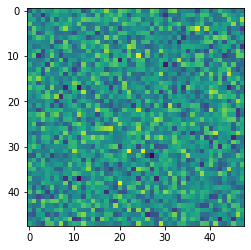

In [12]:
from matplotlib import pyplot as plt
j=1
for i in [w1, w2, w3]:
    t = i[:2304].reshape((48,48))
    plt.imshow(t)
    # plt.show()
    plt.savefig("w"+str(j)+".png")
    j = j+1

16.862783605855935
830
1120
2451
389
2439


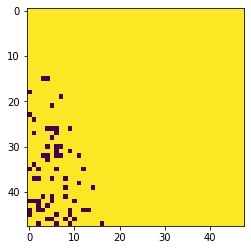

In [16]:
# report rmse for part c
yhat = xte.T.dot(w3)
# print(yhat)
rmse = (((yhat-yte)**2).mean()) ** 0.5
print(rmse)

errors = abs(yte - yhat)
errors_idx = np.argsort(errors)
errors_idx = errors_idx[::-1]
errors_idx = errors_idx[0:5]

for i in errors_idx:
    print(i)
    image = xte[:-1, i].reshape((48,48))
    image_file = str(i)+".png"
    plt.imshow(image)
    plt.savefig(image_file)


In [15]:
for i in errors_idx:
    print("Index :\t", i)
    
    print("y :\t", yte[i])
    print("yhat :\t", yhat[i])

Index :	 830
y :	 89.0
yhat :	 27.948594193100362
Index :	 1120
y :	 99.0
yhat :	 38.389028544143166
Index :	 2451
y :	 3.0
yhat :	 62.37672341400574
Index :	 389
y :	 8.0
yhat :	 62.49544910618134
Index :	 2439
y :	 20.0
yhat :	 73.09878958709973
